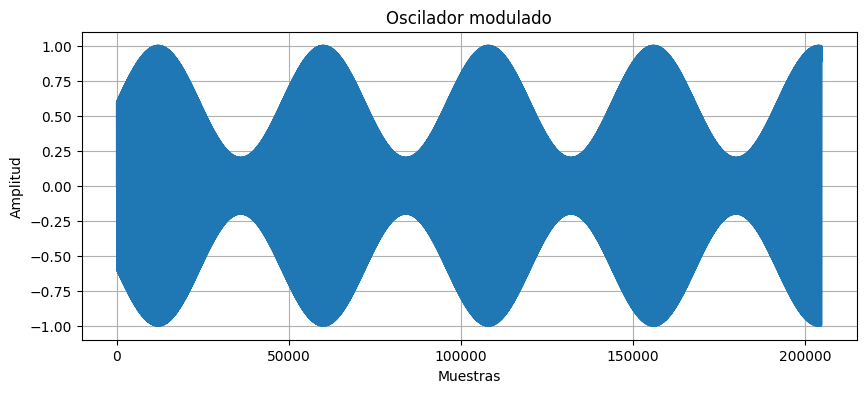

In [40]:
#%% librerías y constantes necesarias
import numpy as np         
import sounddevice as sd       
import matplotlib.pyplot as plt
from tkinter import *

SRATE, CHUNK = 48000, 1024

#%% el oscilador sinusoidal como generador de señal

class Osc:
    def __init__(self,freq=440.0,amp=1.0,phase=0.0):
        self.freq = freq
        self.amp = amp
        self.phase = phase
        self.frame = 0

    def next(self):    
        out = self.amp*np.sin(2*np.pi*(np.arange(self.frame,self.frame+CHUNK))*self.freq/SRATE)
        self.frame += CHUNK
        return out

class Modulator:
    def __init__(self,signal,freq=1,v0=0,v1=1):
        self.freq = freq
        self.signal = signal
        self.v0 = v0
        self.v1 = v1 
        self.mod = Osc(freq)
        self.frame = 0
    def next(self):
        mod = self.v0 + ((self.mod.next()+ 1)/2) *(self.v1 - self.v0)
        outSignal = self.signal.next() * mod
        self.frame += CHUNK
        return outSignal
        
# señal que vamos a modular
osc = Osc(freq=440,amp=1.0, phase=0.0)
# con un modulador de 2 Hz y amplitud en [0.2,0.9]
mod = Modulator(osc,freq=1,v0=0.2,v1=1)

signal = []

for i in range(200):
    signal.append(mod.next())
signal = np.concatenate(signal)
sd.play(signal)
sd.wait()

plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Oscilador modulado")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()